In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CODING/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [259]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [260]:
df.duplicated().sum()

0

In [261]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [262]:
fill_value = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=fill_value,inplace=True)
#decided after looking throgh some of the weights and surrounding data that there is no way
#to determine actual weight of each item
#Decided to take the average weight and fill it that way the weight average overall wont change

In [263]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [264]:
grocery_Type = df['Outlet_Type'] =='Grocery Store'
df[grocery_Type].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083 entries, 3 to 8509
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1083 non-null   object 
 1   Item_Weight                1083 non-null   float64
 2   Item_Fat_Content           1083 non-null   object 
 3   Item_Visibility            1083 non-null   float64
 4   Item_Type                  1083 non-null   object 
 5   Item_MRP                   1083 non-null   float64
 6   Outlet_Identifier          1083 non-null   object 
 7   Outlet_Establishment_Year  1083 non-null   int64  
 8   Outlet_Size                528 non-null    object 
 9   Outlet_Location_Type       1083 non-null   object 
 10  Outlet_Type                1083 non-null   object 
 11  Item_Outlet_Sales          1083 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.0+ KB


In [265]:
df[grocery_Type]['Outlet_Size'].value_counts()
small_Value = 'Small'
df.loc[grocery_Type,'Outlet_Size'] = small_Value
#noticed all grocery stores are type small or nan so filled them in small

In [266]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [267]:
df.groupby(['Outlet_Location_Type','Outlet_Size']).sum()


Item_Weight  ...  Item_Outlet_Sales
Outlet_Location_Type Outlet_Size                ...                   
Tier 1               Medium       12013.225000  ...       2.183970e+06
                     Small        18754.961657  ...       2.298089e+06
Tier 2               Small        11931.295000  ...       2.268123e+06
Tier 3               High         12121.730000  ...       2.142664e+06
                     Medium       23968.363247  ...       5.305749e+06
                     Small         7166.800000  ...       1.883402e+05

[6 rows x 5 columns]

In [268]:
Tier2 = df['Outlet_Location_Type']=='Tier 2'
df[Tier2].isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [269]:
df.loc[Tier2,'Outlet_Size'] = small_Value
#I noticed tier 2 outlet types were all small so filled in the rest small

In [270]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [271]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [272]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [273]:
#checked all the columns value counts and fixed all the inconsistent data

In [274]:
df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt


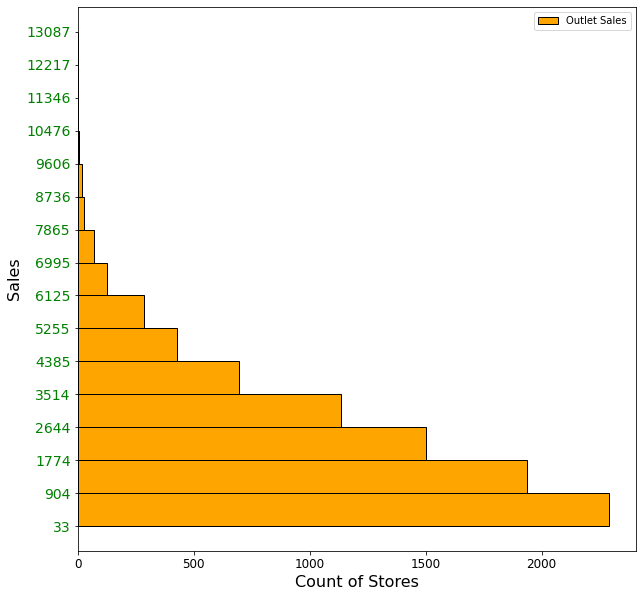

In [276]:
plt.figure(figsize=(10,10))
counts,bins,patches = plt.hist(df['Item_Outlet_Sales'],
         bins=15,
         label='Outlet Sales',
         color='orange',
         edgecolor='black',
         orientation='horizontal')
plt.xlabel('Count of Stores',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.yticks(bins,color='green',fontsize=14)
plt.xticks(fontsize=12)
plt.legend();

In [277]:
large_outlet = df['Outlet_Size']=='High'
small_outlet = df['Outlet_Size']=='Small'

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


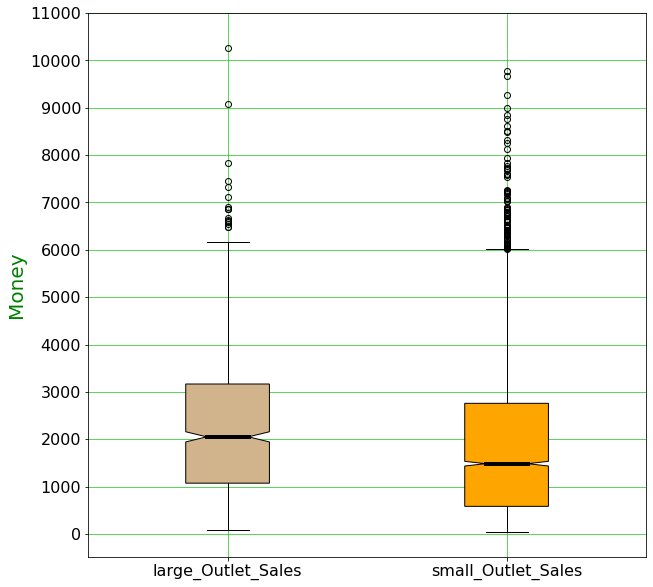

In [337]:
item_price1 = df[large_outlet]['Item_Outlet_Sales']
item_price2 = df[small_outlet]['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
boxplot = axes.boxplot([item_price1,item_price2],
             labels=['large_Outlet_Sales','small_Outlet_Sales'],
             notch=True,
             widths=.3,
             patch_artist=True,
             boxprops= dict(color='black',facecolor='orange'),
             medianprops = dict(linewidth=4,color='black')
             )
box1 = boxplot['boxes'][0]
box1.set_facecolor('tan')
plt.ylabel('Money',color='green',fontsize=20)
plt.yticks(np.arange(0,12000, step=1000),fontsize=16)
plt.xticks(fontsize=16)
plt.grid(color='limegreen');

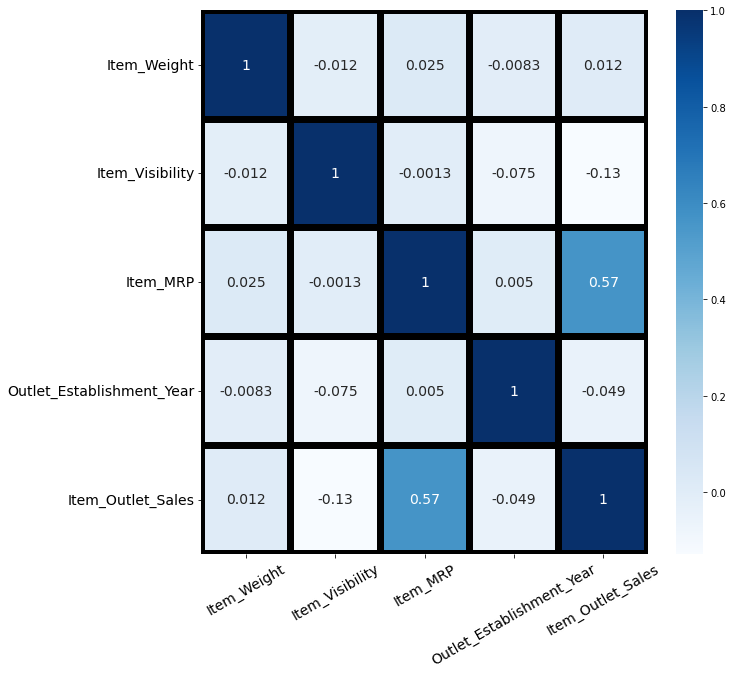

In [375]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,cmap='Blues', annot=True,linewidths=6,linecolor='black',annot_kws={"fontsize":14})
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14,rotation=0);